In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Define expense data
data = [
    {"Date": "2025-06-01", "Category": "Food", "Amount": 250},
    {"Date": "2025-06-03", "Category": "Transport", "Amount": 80},
    {"Date": "2025-06-05", "Category": "Rent", "Amount": 5000},
    {"Date": "2025-06-10", "Category": "Food", "Amount": 300},
    {"Date": "2025-06-15", "Category": "Shopping", "Amount": 1200},
    {"Date": "2025-06-20", "Category": "Entertainment", "Amount": 600},
    {"Date": "2025-06-25", "Category": "Food", "Amount": 280},
]


In [3]:
# Create DataFrame
df = pd.DataFrame(data)
df


,Date,Category,Amount
0,2025-06-01,Food,250
1,2025-06-03,Transport,80
2,2025-06-05,Rent,5000
3,2025-06-10,Food,300
4,2025-06-15,Shopping,1200
5,2025-06-20,Entertainment,600
6,2025-06-25,Food,280


In [4]:
# Total expenses
df["Amount"].sum()


np.int64(7710)

In [5]:
# Total by category
df.groupby("Category")["Amount"].sum()


Category
Entertainment     600
Food              830
Rent             5000
Shopping         1200
Transport          80
Name: Amount, dtype: int64

In [6]:
# Add weekday
df["Date"] = pd.to_datetime(df["Date"])
df["Weekday"] = df["Date"].dt.day_name()
df


,Date,Category,Amount,Weekday
0,2025-06-01,Food,250,Sunday
1,2025-06-03,Transport,80,Tuesday
2,2025-06-05,Rent,5000,Thursday
3,2025-06-10,Food,300,Tuesday
4,2025-06-15,Shopping,1200,Sunday
5,2025-06-20,Entertainment,600,Friday
6,2025-06-25,Food,280,Wednesday


In [7]:
# Expenses by weekday
df.groupby("Weekday")["Amount"].sum().sort_values()


Weekday
Wednesday     280
Tuesday       380
Friday        600
Sunday       1450
Thursday     5000
Name: Amount, dtype: int64

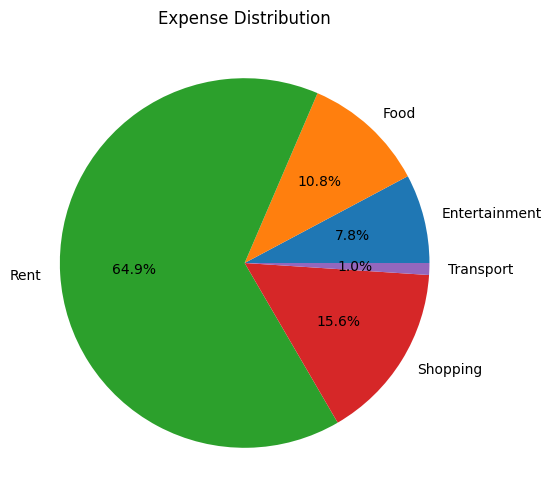

In [8]:
# Pie chart by category
df.groupby("Category")["Amount"].sum().plot.pie(autopct="%1.1f%%", figsize=(6,6))
plt.title("Expense Distribution")
plt.ylabel("")
plt.show()


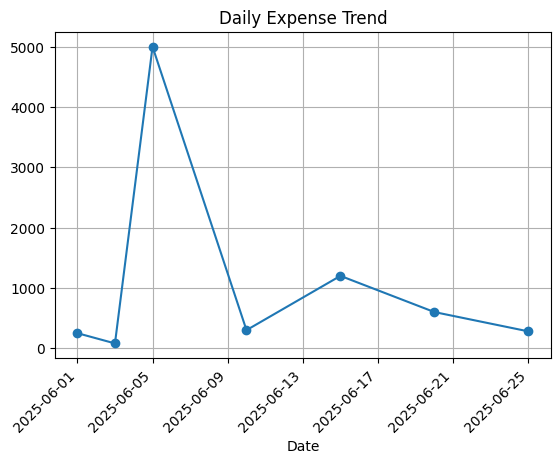

In [9]:
# Daily trend line
df.groupby("Date")["Amount"].sum().plot(marker="o")
plt.title("Daily Expense Trend")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [10]:
# Highest spending day
df[df["Amount"] == df["Amount"].max()]


,Date,Category,Amount,Weekday
2,2025-06-05,Rent,5000,Thursday


In [11]:
# Add comments
df["Comment"] = df["Amount"].apply(lambda x: "Too much!" if x > 1000 else "Okay")
df


,Date,Category,Amount,Weekday,Comment
0,2025-06-01,Food,250,Sunday,Okay
1,2025-06-03,Transport,80,Tuesday,Okay
2,2025-06-05,Rent,5000,Thursday,Too much!
3,2025-06-10,Food,300,Tuesday,Okay
4,2025-06-15,Shopping,1200,Sunday,Too much!
5,2025-06-20,Entertainment,600,Friday,Okay
6,2025-06-25,Food,280,Wednesday,Okay


In [12]:
# Save report
df.to_csv("expenses_report.csv", index=False)
